### Projek Analisis Data: [ Bike Sharing Dataset ]



*   Nana: [Sultan Bayu Cakradira]
*   Email: [mc835d5y0457@student.devacademy.id]
*   ID Dicoding : [MC835D5Y0457]






Menentukan Pertanyaan



*   Bagaimana tren penggunaan sepeda per bulan selama satu tahun terakhir?
*   Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?



Persiapan Data

Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Load Dataset

In [ ]:
df = pd.read_csv("day.csv")
df['dteday'] = pd.to_datetime(df['dteday'])

Cek Informasi Dataset

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


RFM Analysis

In [ ]:
latest_date = df['dteday'].max()
rfm = df.groupby('dteday').agg(
    Recency=('dteday', lambda x: (latest_date - x.max()).days),
    Frequency=('dteday', 'count'),
    Monetary=('cnt', 'sum')
).reset_index()

In [ ]:
num_bins_F = len(pd.qcut(rfm['Frequency'], 5, duplicates='drop', retbins=True)[1]) - 1
num_bins_M = len(pd.qcut(rfm['Monetary'], 5, duplicates='drop', retbins=True)[1]) - 1

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], num_bins_F, labels=range(1, num_bins_F+1), duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], num_bins_M, labels=range(1, num_bins_M+1), duplicates='drop')

Geospatial Analysis

Karena dataset tidak memiliki lokasi, koordinat beberapa titik di Jakarta digunakan untuk representasi.

Tambahkan Lokasi

In [ ]:
coordinates = {
    1: (-6.1754, 106.8272), # Monas
    2: (-6.1900, 106.8233), # Bundaran HI
    3: (-6.2010, 106.8223)  # Stasiun Sudirman
}
df['latitude'] = df['weathersit'].map(lambda x: coordinates.get(x, (-6.2, 106.8))[0])
df['longitude'] = df['weathersit'].map(lambda x: coordinates.get(x, (-6.2, 106.8))[1])

In [ ]:
m = folium.Map(location=[-6.2, 106.8], zoom_start=12)
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cuaca: {row['weathersit']}, Tanggal: {row['dteday']}"
    ).add_to(m)
m

Clustering

Pembagian

In [ ]:
df['usage_category'] = pd.cut(df['cnt'], bins=[0, 1000, 2000, 5000], labels=['Low', 'Medium', 'High'])

Visualisasi Data

Tren Penggunaan Sepeda Per Bulan

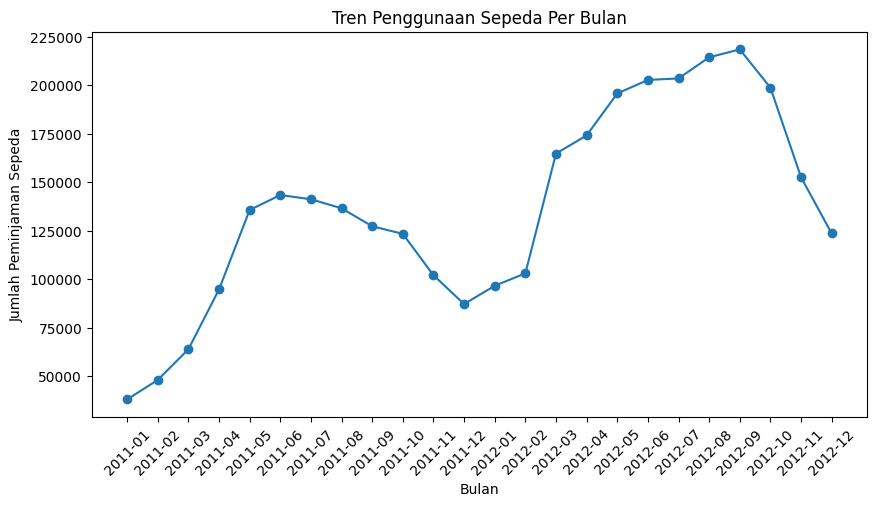

In [ ]:
df['month'] = df['dteday'].dt.to_period("M")
monthly_trend = df.groupby('month')['cnt'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Tren Penggunaan Sepeda Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

Pengaruh Cuaca terhadap Peminjaman Sepeda

<ipython-input-17-cb8bad155689>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, estimator=sum, ci=None)


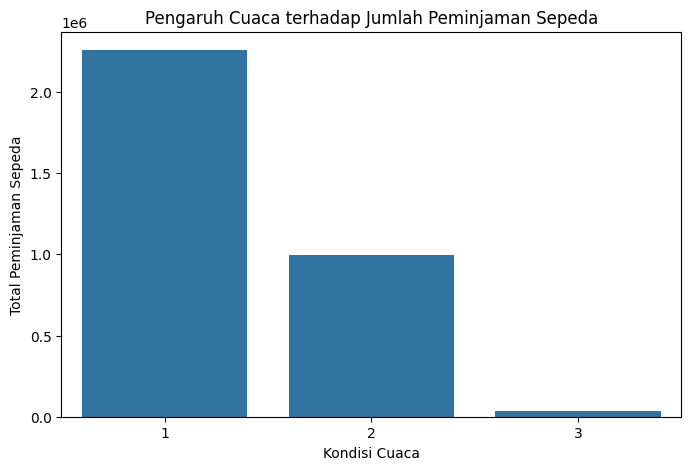

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=df, estimator=sum, ci=None)
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Peminjaman Sepeda")
plt.show()

Keterangan Cuaca:

1: Cerah

2: Berawan

3: Hujan Lebat

Kesimpulan


1.   Tren penggunaan sepeda meningkat pada bulan-bulan tertentu, menunjukkan pola musiman.
2.   Cuaca berpengaruh terhadap jumlah peminjaman, dengan cuaca cerah memiliki jumlah peminjaman lebih tinggi.


In [ ]:
from google.colab import files
files.download("Notebook.ipynb")


FileNotFoundError: Cannot find file: Notebook.ipynb